In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('/content/placement.csv')

In [25]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [26]:
df.shape

(100, 4)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [28]:
df = df.iloc[:, 1:]

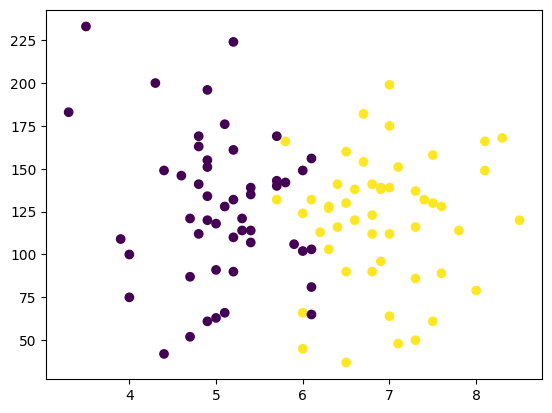

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [30]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]
X,y

(    cgpa     iq
 0    6.8  123.0
 1    5.9  106.0
 2    5.3  121.0
 3    7.4  132.0
 4    5.8  142.0
 ..   ...    ...
 95   4.3  200.0
 96   4.4   42.0
 97   6.7  182.0
 98   6.3  103.0
 99   6.2  113.0
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [33]:
X_train

,cgpa,iq
67,5.0,118.0
93,6.8,112.0
17,3.3,183.0
14,6.1,103.0
62,6.0,102.0
...,...,...
99,6.2,113.0
54,6.4,141.0
55,7.8,114.0
3,7.4,132.0


In [34]:
y_train

67    0
93    1
17    0
14    0
62    0
     ..
99    1
54    1
55    1
3     1
78    0
Name: placement, Length: 90, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_train

array([[-9.27750018e-01, -7.98096880e-02],
       [ 6.77971167e-01, -2.43677488e-01],
       [-2.44426447e+00,  1.69542482e+00],
       [ 5.35240395e-02, -4.89479189e-01],
       [-3.56826930e-02, -5.16790489e-01],
       [-5.70923088e-01,  4.93727613e-01],
       [-3.03302891e-01,  5.21038913e-01],
       [ 9.45591365e-01, -1.99160069e+00],
       [-5.70923088e-01,  3.84482413e-01],
       [-7.49336553e-01,  1.09457621e+00],
       [-1.28457695e+00,  6.84906714e-01],
       [ 5.35240395e-02,  9.58019714e-01],
       [-1.10616348e+00,  5.48350213e-01],
       [ 5.35240395e-02, -1.52730859e+00],
       [-3.56826930e-02,  8.40581124e-02],
       [-7.49336553e-01, -8.44526090e-01],
       [-2.14096158e-01,  1.23113271e+00],
       [ 7.67177900e-01,  4.93727613e-01],
       [-9.27750018e-01, -8.17214790e-01],
       [-5.70923088e-01, -1.89054888e-01],
       [-1.81981734e+00, -1.25419559e+00],
       [ 8.56384632e-01,  1.47693442e+00],
       [-1.01695675e+00, -2.51870878e-02],
       [-3.

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [50]:
y_test

50    0
34    0
42    1
63    1
88    0
94    0
16    0
71    1
26    1
1     0
Name: placement, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

<Axes: >

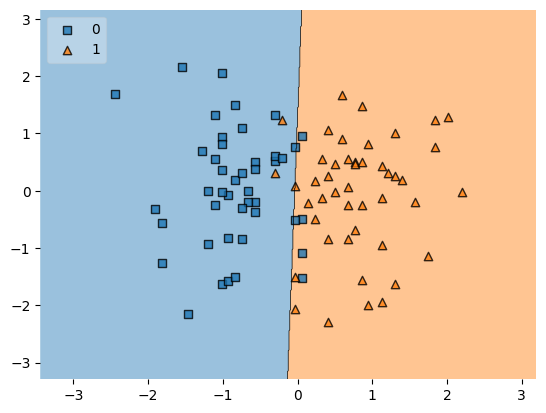

In [52]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [53]:
import pickle

In [54]:
pickle.dump(clf, open('model.pkl', 'wb'))